# Load Packages

In [152]:
import numpy as np
import pandas as pd

#시각화
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import koreanize_matplotlib #한글 깨짐 방지
import plotly.express as px

#날짜
from datetime import datetime

#확률분포
from scipy.stats import uniform, randint

#모델 저장
import pickle

from statsmodels.stats.outliers_influence import variance_inflation_factor #다중공선성 VIF

#Scikit learn
from sklearn import tree
from sklearn.pipeline import Pipeline #파이프라인
from sklearn.pipeline import make_pipeline # 특성공학 + 학습
from sklearn.preprocessing import OneHotEncoder # 원핫인코딩(범주형변수 -> 수치형 변수)
from sklearn.impute import SimpleImputer # 결측값 단순 대치 기법

from sklearn.model_selection import train_test_split #데이터 분할
from sklearn.model_selection import GridSearchCV #그리드서치 하이퍼파라미터 튜닝
from sklearn.model_selection import RandomizedSearchCV #랜덤서치 하이퍼파라미터 튜닝
from sklearn.model_selection import cross_val_predict #Cross Validation predict

import graphviz #결정트리 시각화
from sklearn.tree import plot_tree #결정트리 시각화
from sklearn.tree import export_graphviz #결정트리 시각화
from sklearn.tree import DecisionTreeClassifier #결정트리 분류
from sklearn.tree import DecisionTreeRegressor #결정트리 회귀

from sklearn.metrics import accuracy_score #정확도 구하기
from sklearn.metrics import r2_score #결정계수
from sklearn.metrics import mean_squared_error, root_mean_squared_error #MSE, RMSE
from sklearn.metrics import accuracy_score #정확도
from sklearn.metrics import f1_score #f1 score
from sklearn.metrics import roc_auc_score, roc_curve #ROC 곡선
from sklearn.metrics import confusion_matrix #오차행렬(실제, 예측 행렬)

from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트 분류
from sklearn.ensemble import RandomForestRegressor # 랜덤포레스트 회귀
from sklearn.ensemble import GradientBoostingClassifier # 그래디언트 부스트 분류
from sklearn.ensemble import GradientBoostingRegressor # 그래디언트 부스트 회귀
from sklearn.ensemble import AdaBoostClassifier #ada부스트 분류

from sklearn.linear_model import LinearRegression #선형회귀
from sklearn.linear_model import LogisticRegression # 로지스틱회귀
from sklearn.linear_model import Lasso #라쏘회귀
from sklearn.linear_model import Ridge #릿지회귀
from sklearn.linear_model import ElasticNet #엘라스틱넷 규제

from sklearn.preprocessing import PolynomialFeatures #다항회귀
from sklearn.preprocessing import StandardScaler #표준화
from sklearn.preprocessing import MinMaxScaler #0~1정규화

from sklearn.inspection import permutation_importance #변수의 중요도

from sklearn.cluster import KMeans #KMeans 군집분석
from yellowbrick.cluster import KElbowVisualizer #KMeans 군집분석 최적의 K값 찾기
from sklearn.metrics import silhouette_score #실루엣 점수
from yellowbrick.cluster import SilhouetteVisualizer #실루엣 점수 시각화
from sklearn.decomposition import PCA #PCA 주성분 분석

# 당뇨병 데이터

**당뇨병 데이터**
- Pregnancies : 임신 횟수
- Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure : 이완기 혈압 (mm Hg)
- SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
- Insulin : 2시간 혈청 인슐린 (mu U / ml)
- BMI : 체질량 지수 (체중kg / 키(m)^2)
- DiabetesPedigreeFunction : 당뇨병 혈통 기능
- Age : 나이
- Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

In [3]:
data=pd.read_csv("diabetes.csv")

In [4]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data = data[(data['Glucose'] != 0) & 
            (data['BloodPressure'] != 0) & 
            (data['SkinThickness'] != 0) & 
            (data['Insulin'] != 0) & 
            (data['BMI'] != 0)]

Glucose, Blood, Pressure, SkinThickness, Insulin, BMI의 값이 0인 것은 이상치이다

In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


# 스케일링

In [12]:
scaler=MinMaxScaler()

In [25]:
data.iloc[:, :-1]=scaler.fit_transform(data.iloc[:, :-1])

C:\Users\swoo6\AppData\Local\Temp\ipykernel_18228\3049610131.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.05882353 0.         0.17647059 0.11764706 0.05882353 0.29411765
 0.         0.05882353 0.05882353 0.17647059 0.64705882 0.58823529
 0.05882353 0.76470588 0.17647059 0.17647059 0.23529412 0.23529412
 0.17647059 0.52941176 0.05882353 0.05882353 0.29411765 0.47058824
 0.41176471 0.41176471 0.         0.         0.11764706 0.05882353
 0.23529412 0.11764706 0.29411765 0.23529412 0.41176471 0.11764706
 0.11764706 0.88235294 0.23529412 0.41176471 0.11764706 0.35294118
 0.05882353 0.35294118 0.05882353 0.05882353 0.05882353 0.23529412
 0.17647059 0.         0.17647059 0.47058824 0.05882353 0.41176471
 0.23529412 0.         0.11764706 0.05882353 0.17647059 0.05882353
 0.05882353 0.23529412 0.17647059 0.11764706 0.11764706 0.
 0.         0.29411765 0.11764706 0.23529412 0.11764706 0.05882353
 0.52941176 0.05882

In [26]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,0.058824,0.232394,0.488372,0.285714,0.096154,0.202454,0.035118,0.000000,0
4,0.000000,0.570423,0.186047,0.500000,0.185096,0.509202,0.943469,0.200000,1
6,0.176471,0.154930,0.302326,0.446429,0.088942,0.261759,0.069807,0.083333,1
8,0.117647,0.992958,0.534884,0.678571,0.635817,0.251534,0.031263,0.533333,1
13,0.058824,0.936620,0.418605,0.285714,1.000000,0.243354,0.134047,0.633333,1
...,...,...,...,...,...,...,...,...,...
753,0.000000,0.880282,0.744186,0.660714,0.596154,0.513292,0.058672,0.083333,1
755,0.058824,0.507042,0.744186,0.571429,0.115385,0.374233,0.416274,0.266667,1
760,0.117647,0.225352,0.395349,0.339286,0.002404,0.208589,0.291649,0.016667,0
763,0.588235,0.316901,0.604651,0.732143,0.199519,0.300613,0.036831,0.700000,0


당뇨병에 혈압, 인슐린, 나이가 제일 영향을 많이 끼치는 것 같다.

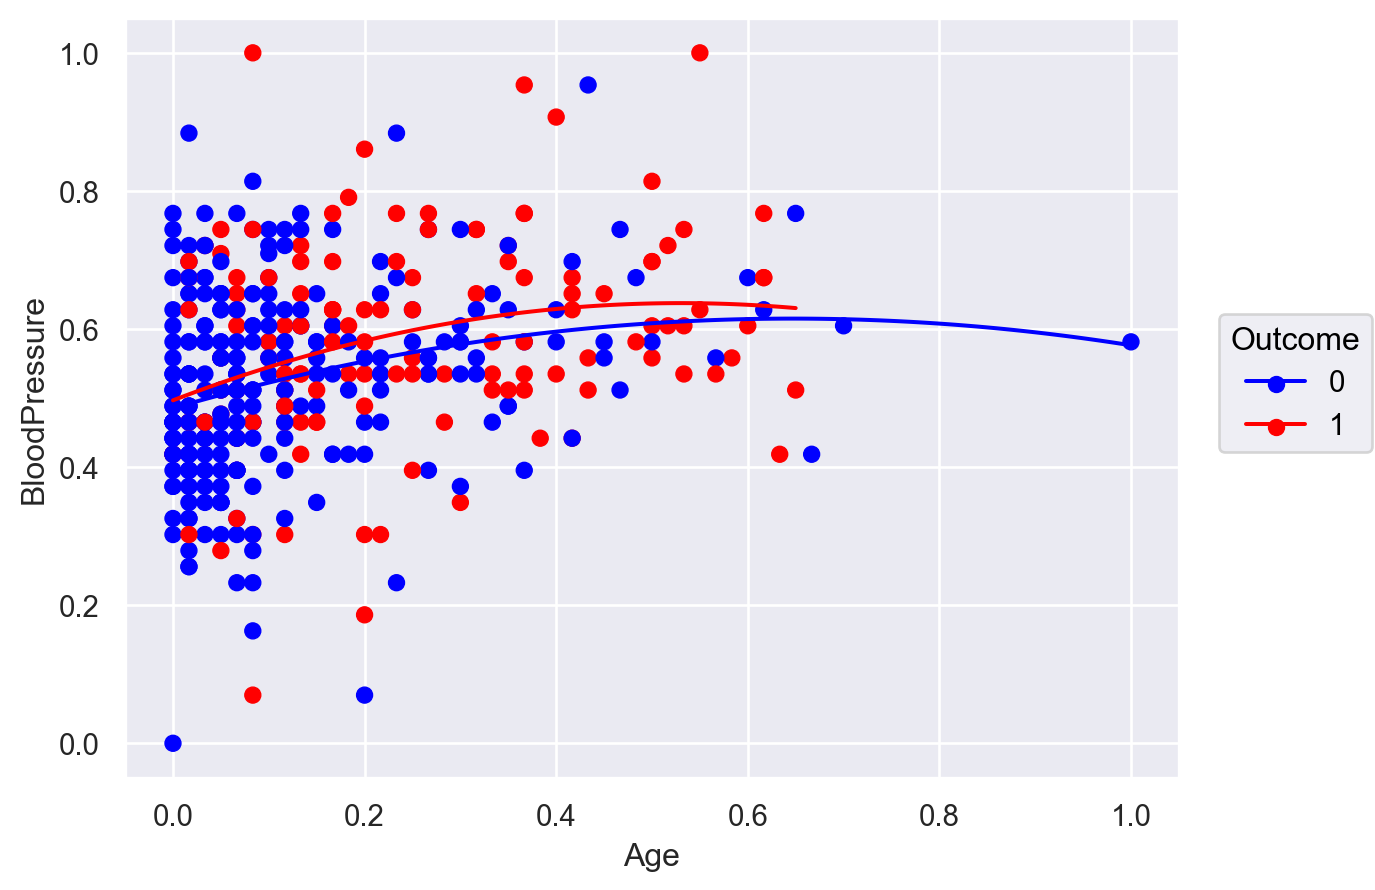

In [39]:
(
    so.Plot(data, x="Age", y="BloodPressure", color="Outcome")
    .add(so.Dot())
    .add(so.Line(), so.PolyFit(2))
    .scale(color={0: "blue", 1: "red"})
)

나이와 혈압의 관계는 잘 모르겠다

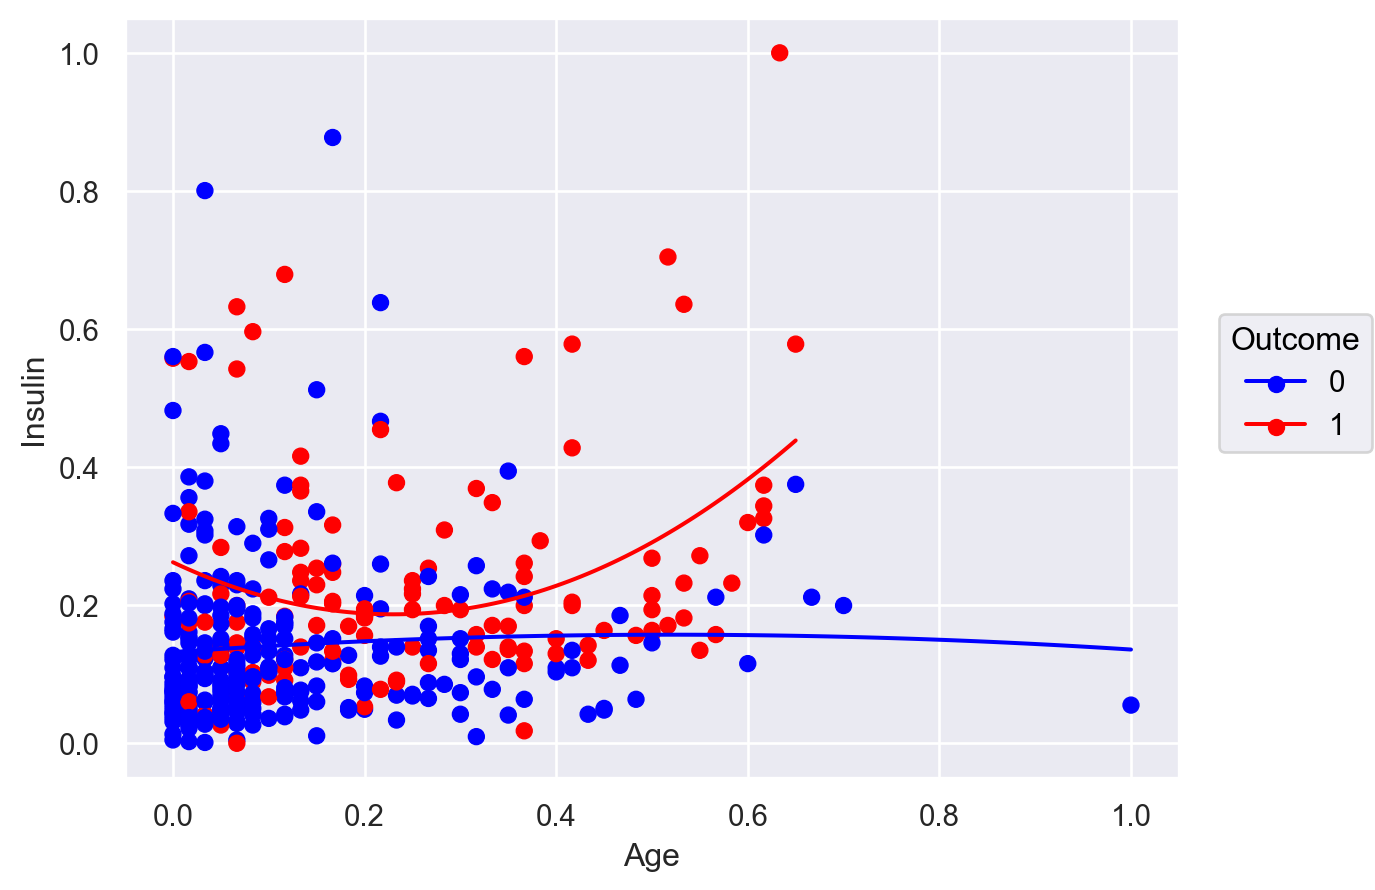

In [38]:
(
    so.Plot(data, x="Age", y="Insulin", color="Outcome")
    .add(so.Dot())
    .add(so.Line(), so.PolyFit(2))
    .scale(color={0: "blue", 1: "red"})
)

당뇨병이 있는 사람들 중 나이가 많을수록 인슐린이 증가한다?

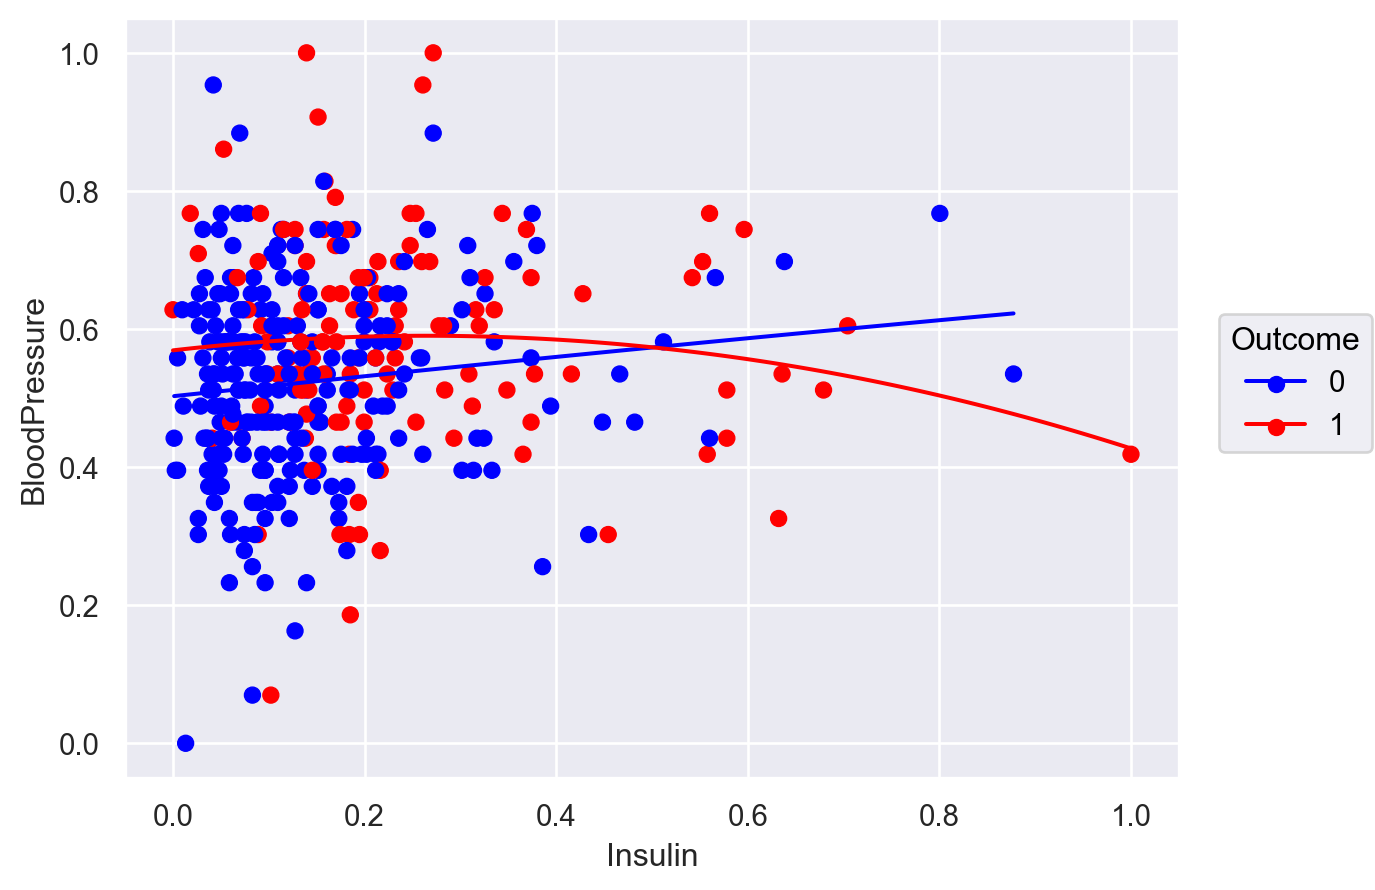

In [41]:
(
    so.Plot(data, x="Insulin", y="BloodPressure", color="Outcome")
    .add(so.Dot())
    .add(so.Line(), so.PolyFit(2))
    .scale(color={0: "blue", 1: "red"})
)

혈압과 인슐린의 관계도 잘 모르겠다.

In [42]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


다시 한번 상관관계를 봤더니 **글루코스, 나이** 순으로 당뇨병에 영향을 끼친다는 것을 볼 수 있다.
- 변수 두개만 추출

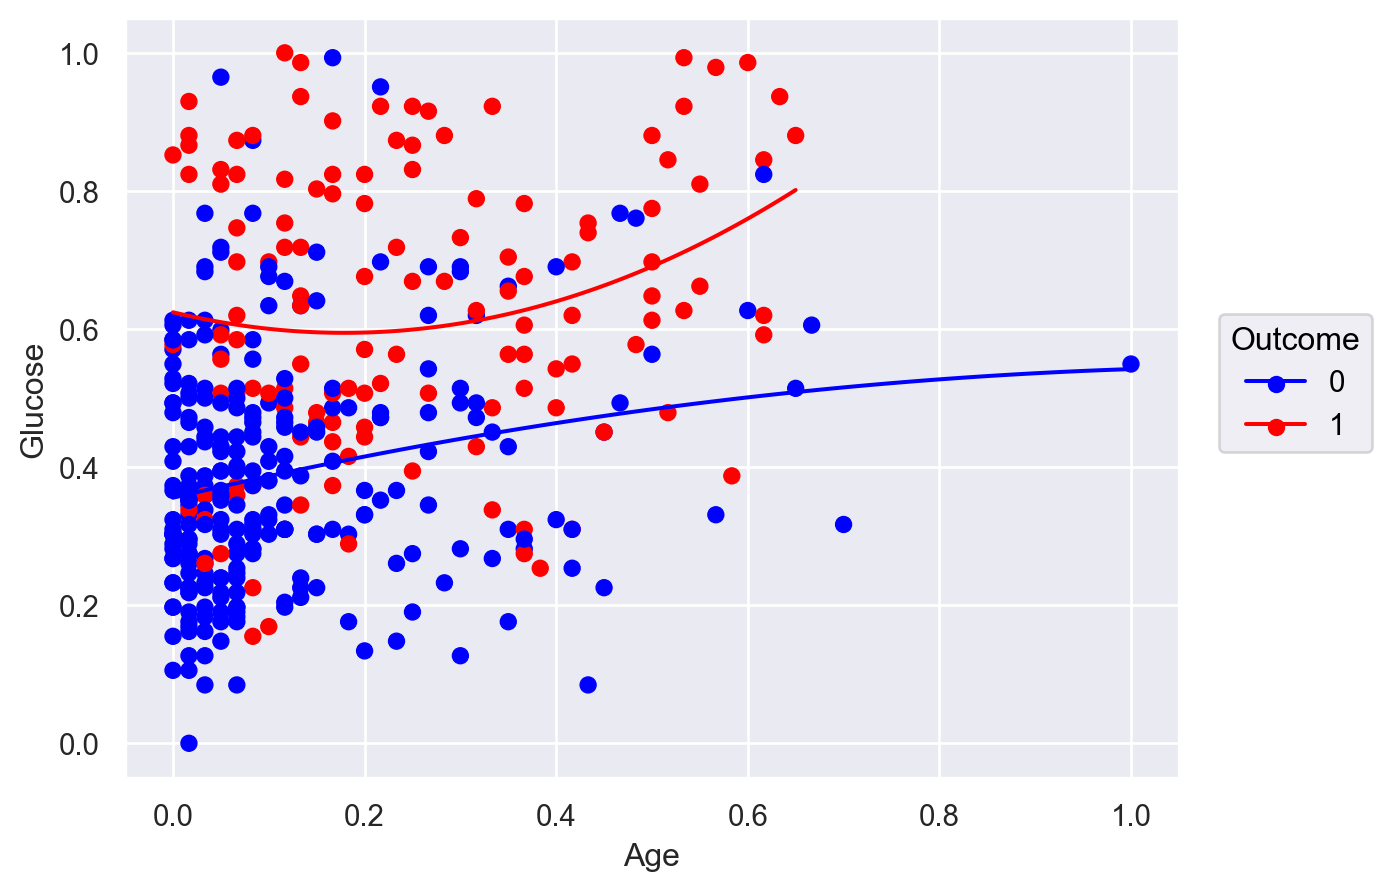

In [57]:
(
    so.Plot(data, x="Age", y="Glucose", color="Outcome")
    .add(so.Dot())
    .add(so.Line(), so.PolyFit(2))
    .scale(color={0: "blue", 1: "red"})
)

나이와 글루코스의 분포가 더욱 명확히 보이는 것 같다.
- 당뇨병 걸린 사람들은 나이에 상관없이 글루코스 수치가 더 높은 편이다

이것들을 이용해 비지도학습을 진행하겠다.

# 비지도학습

In [59]:
df_km=data[["Glucose", "Age", "Outcome"]]

## 1. Kmeans

### elbow plot

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

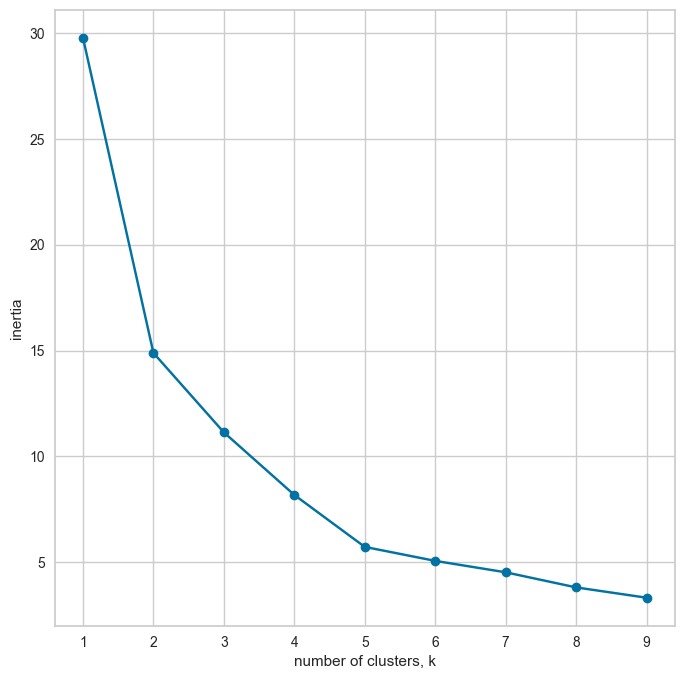

In [62]:
ks = range(1,10)
inertias = [] #각 중심점에서 데이터포인트 간의 거리 제곱합

for k in ks:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(df_km.drop("Outcome", axis=1))
    inertias.append(model.inertia_)

plt.figure(figsize=(8, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

elbow plot을 그려보니 클러스터의 개수는 두개 또는 세개가 적당해보인다

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

KElbowVisualizer(ax=<Axes: >,
                 estimator=KMeans(n_clusters=9, n_init=10, random_state=1234),
                 k=(2, 10))

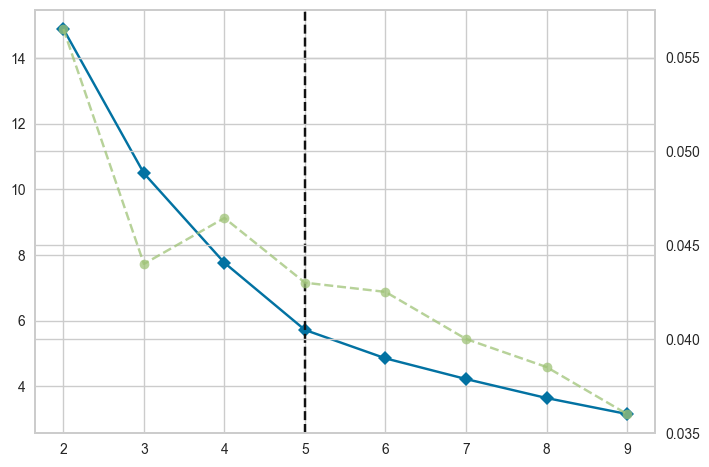

In [112]:
model = KMeans(random_state=1234, n_init=10) #n_init : 초기 중심점 n번 변동 후 최적의 결과 생성
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df_km.drop("Outcome", axis=1))

5개의 클러스터링이 적당해보인다

### modelling

- n_clusters : 클러스터링 개수
- init : 초기 중심 선택 방법 (k-means++, random)
- n_init : 초기 중심점을 찾는데 몇번 반복할것인지 (지정, auto)
- max_iter : 최대 반복 횟수
- tol : 수렴 기준

In [113]:
kmeans = KMeans(n_clusters=5, random_state=1234, n_init=10)

In [114]:
kmeans.fit(df_km.drop("Outcome", axis=1))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=5, n_init=10, random_state=1234)

In [117]:
df_kmv=df_km.copy() #예측용

In [118]:
df_kmv['cluster'] = kmeans.fit_predict(df_kmv.drop("Outcome", axis=1))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [119]:
df_kmv.head()

,Glucose,Age,Outcome,cluster
3,0.232394,0.000000,0,0
4,0.570423,0.200000,1,2
6,0.154930,0.083333,1,0
8,0.992958,0.533333,1,3
13,0.936620,0.633333,1,3


### visualization

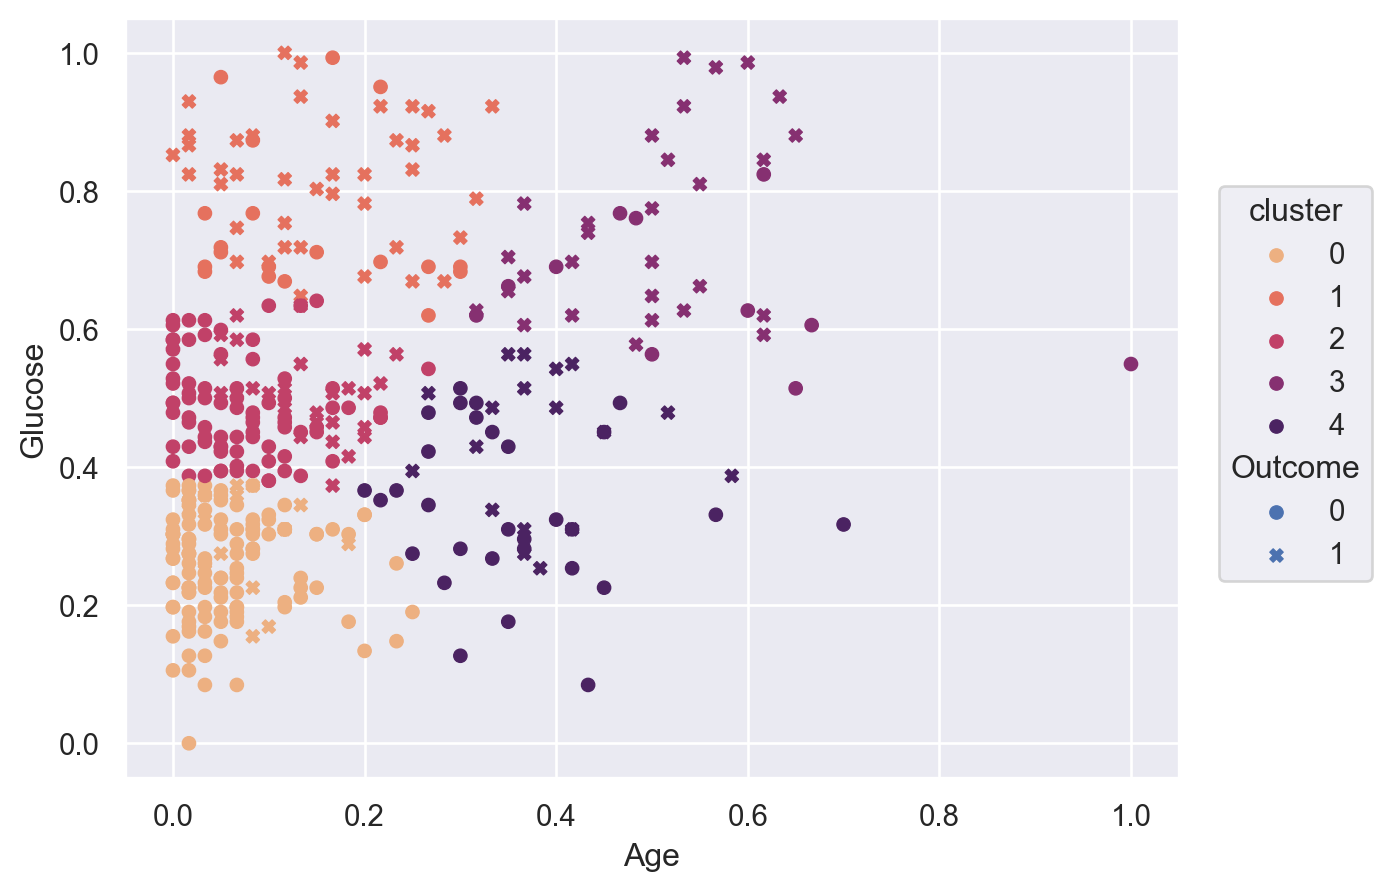

In [138]:
(
    so.Plot(df_kmv, x="Age", y="Glucose", color="cluster", marker="Outcome")
    .add(so.Dot(pointsize=5))
    .scale(color="flare")
)

각 클러스터별로 특색이 구분되어 보여지는 것 같다.
- 특히 3번 클러스터는 당뇨병 환자가 많이 분포하며 나이와 글루코스 수치가 높다.
- 1번 클러스터도 당뇨병 환자가 많고 나이는 적은 편이지만 글루코스 수치가 높다.
- 4번클러스터는 당뇨병 환자의 비율이 반반정도 되고 나이는 많지만 글루코스 수치는 낮은 편이다.
- 2번 클러스터는 당뇨병 환자의 비율이 반 이하이고 글루코스와 나이가 적은 편이다.
- 0번 클러스트너느 당뇨병 환자의 비율이 제일 적고 나이와 글루코스 수치가 제일 적다.

### silhouette coefficient

In [150]:
k_range = range(2, 11)
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1234, n_init=10)
    cluster_labels = kmeans.fit_predict(df_km[["Glucose", "Age"]])
    silhouette_avg = silhouette_score(df_km[["Glucose", "Age"]], cluster_labels) #실루엣 계수 계산
    silhouette_scores.append({
        'k': k,
        'silhouette_score': silhouette_avg
    })

silhouette_df = pd.DataFrame(silhouette_scores)
silhouette_df

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

,k,silhouette_score
0,2,0.483911
1,3,0.463851
2,4,0.386075
3,5,0.422879
4,6,0.429392
5,7,0.374158
6,8,0.386200
7,9,0.384624
8,10,0.384674


클러스터 개수가 늘수록 실루엣 계수가 줄어든다.
- 각 클러스터가 서로 분리가 잘 안된다는 것을 의미한다.

<br>`하지만 클러스터의 개수가 5,6개일때 점수가 소폭 상승한다`

그림으로 확인해보자.
<br>**`박교수님의 EDA수업때 본 내용이 있으므로 복습하자`**

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


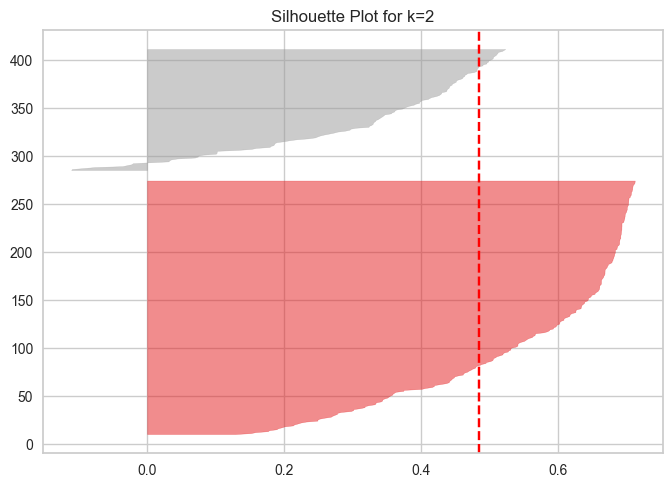

In [145]:
k=2
kmeans = KMeans(n_clusters=k, random_state=1234, n_init=10)
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(df_km[['Glucose','Age']])
plt.title(f'Silhouette Plot for k={k}')
plt.show()

빨간색 점선은 전체 실루엣 점수의 평균을 나타낸다.<br>
y축은 데이터의 번호이다<br>
클러스터링이 2개일 때 조금 음의 점수를 갖는 모습을 보인다.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


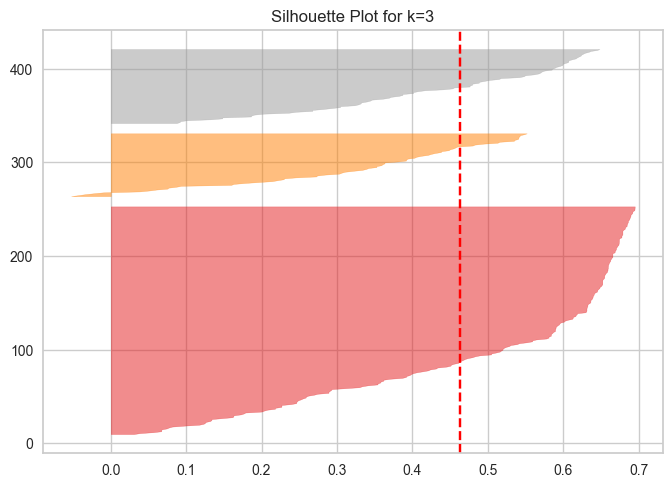

In [146]:
k=3
kmeans = KMeans(n_clusters=k, random_state=1234, n_init=10)
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(df_km[['Glucose','Age']])
plt.title(f'Silhouette Plot for k={k}')
plt.show()

클러스터가 2개일 때보다 더 안정적이지만 뭔가 좀 부족한 느낌이다.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


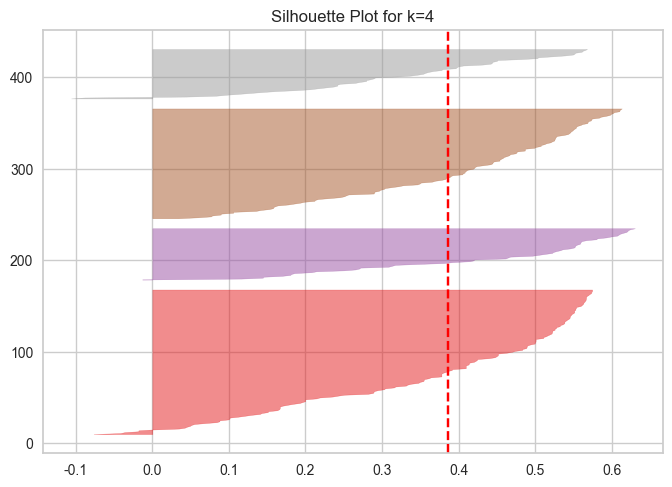

In [147]:
k=4
kmeans = KMeans(n_clusters=k, random_state=1234, n_init=10)
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(df_km[['Glucose','Age']])
plt.title(f'Silhouette Plot for k={k}')
plt.show()

3개일때보다 실루엣점수가 낮아졌고, 데이터의 전체적인 안정성도 낮아진 느낌이다.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


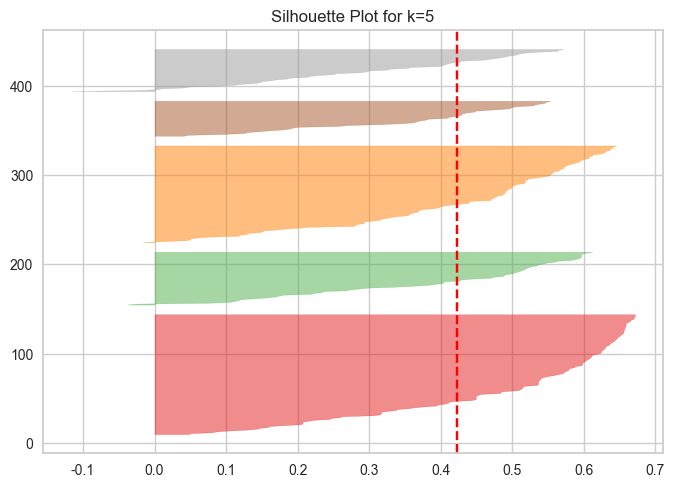

In [148]:
k=5
kmeans = KMeans(n_clusters=k, random_state=1234, n_init=10)
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(df_km[['Glucose','Age']])
plt.title(f'Silhouette Plot for k={k}')
plt.show()

실루엣 점수가 소폿 상승, 일부 데이터를 제외하면 음의 실루엣 점수를 갖는 것은 거의 없다.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


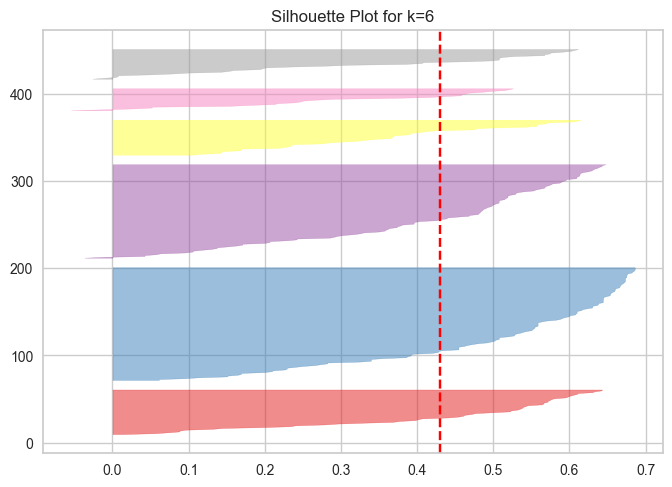

In [149]:
k=6
kmeans = KMeans(n_clusters=k, random_state=1234, n_init=10)
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(df_km[['Glucose','Age']])
plt.title(f'Silhouette Plot for k={k}')
plt.show()

실루엣 점수가 좀 늘어났다.
- 몇몇 데이터의 실루엣 점수는 음의 값을 가진다. 
- 근데 너무 많이 그룹을 쪼갠 느낌이 든다. 과적합의 느낌


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


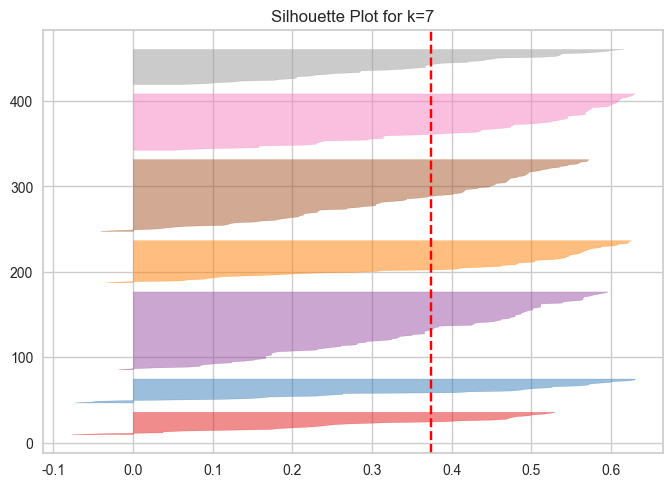

In [151]:
k=7
kmeans = KMeans(n_clusters=k, random_state=1234, n_init=10)
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(df_km[['Glucose','Age']])
plt.title(f'Silhouette Plot for k={k}')
plt.show()

실루엣 점수가 확 낮아졌다.

실루엣 점수를 통해 클러스터가 5,6개일때 결과가 제일 좋다는 것을 알 수 있었다.
<br>추가로 실루엣 시각화를 통해 각 데이터마다 실루엣 점수를 세부적으로 볼 수 있었다. 
- 그 결과 클러스터가 5개일때가 제일 좋아보였다.
- 클러스터링이 많으면 많을수록 과적합이 발생할 가능성이 높아진다.

## PCA

pca 주성분 분석은 데이터의 변수들간에 숨겨진 교호항을 찾는것을 목적으로 한다. 

`안교수님의 다변량해석 강의때 배운 내용이다.`
- 복습하자
- 다만 R프로그램으로만 해가지고 파이썬에선 어떤 기능이 달라졌는지 확인해봐야한다.


# **이번주는 다 못해서 죄송합니다!**
- PCA의 수학적인 이론 다시 공부해오고 오겠습니다